In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize


In [2]:
df= pd.read_csv(r"D:\Datasets\medium_data_Bidirectional.csv\medium_data.csv")

In [3]:
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [4]:
# import PIL
# import urllib.request
# img= np.array(PIL.Image.open(urllib.request.urlopen(df['url'][0]+'/'+df['image'][0])))

In [5]:
df.shape

(6508, 10)

In [6]:
# out of all these columns we are intrested in only title column 
df['title'][1:10]

1    Hands-on Graph Neural Networks with PyTorch & ...
2                         How to Use ggplot2 in Python
3    Databricks: How to Save Files in CSV on Your L...
4    A Step-by-Step Implementation of Gradient Desc...
5      An Easy Introduction to SQL for Data Scientists
6                        Hypothesis testing visualized
7    Introduction to Latent Matrix Factorization Re...
8         Which 2020 Candidate is the Best at Twitter?
9            What if AI model understanding were easy?
Name: title, dtype: object

## Data Preprocessing

In [7]:
# Remove unwanted character and words in the title

# lower the words
df['clean_data']= [i.lower() for i in df['title']]

# remove punctuations 
df['clean_data']= [i.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))) for i in df['clean_data']]

# replace space and escape characters
df['clean_data']= df['clean_data'].apply(lambda x: x.replace('\xa0', ' '))
df['clean_data']= df['clean_data'].apply(lambda x: x.replace('\u200a', ' '))



In [8]:
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date,clean_data
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30,a beginner’s guide to word embedding with gens...
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30,hands on graph neural networks with pytorch ...
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30,how to use ggplot2 in python
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30,databricks how to save files in csv on your l...
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30,a step by step implementation of gradient desc...


In [9]:
df['title'][124]

'Learn From My Mistake. NEVER Delete Your\xa0Website!'

In [10]:
df['clean_data'][124]

'learn from my mistake  never delete your website '

### Tokenize

In [11]:
tokenizer = Tokenizer(oov_token= '<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(df['clean_data'])
total_words= len(tokenizer.word_index)+1
print('Total words: ',total_words)
print('Word: ID')
print('---------------------------------')
print('<oov>: ', tokenizer.word_index['<oov>'])
print('strong: ', tokenizer.word_index['strong'])
print('And: ', tokenizer.word_index['and'])


Total words:  8234
Word: ID
---------------------------------
<oov>:  1
strong:  4
And:  8


In [12]:
tokenizer.word_index

{'<oov>': 1,
 'to': 2,
 'the': 3,
 'strong': 4,
 'a': 5,
 'of': 6,
 'how': 7,
 'and': 8,
 'in': 9,
 'your': 10,
 'markup': 11,
 'for': 12,
 'you': 13,
 'with': 14,
 'is': 15,
 '—': 16,
 'data': 17,
 'why': 18,
 'class': 19,
 'h3': 20,
 'i': 21,
 'what': 22,
 'on': 23,
 'learning': 24,
 'from': 25,
 'an': 26,
 'be': 27,
 'my': 28,
 'writing': 29,
 'are': 30,
 'it': 31,
 'can': 32,
 'using': 33,
 'design': 34,
 'machine': 35,
 'ux': 36,
 'about': 37,
 'do': 38,
 'not': 39,
 'python': 40,
 'ai': 41,
 'life': 42,
 'that': 43,
 'when': 44,
 'should': 45,
 'we': 46,
 '5': 47,
 'science': 48,
 'make': 49,
 'time': 50,
 'need': 51,
 'as': 52,
 '3': 53,
 'more': 54,
 'at': 55,
 'business': 56,
 'or': 57,
 'part': 58,
 'have': 59,
 'work': 60,
 'new': 61,
 'don’t': 62,
 'up': 63,
 'by': 64,
 'write': 65,
 'get': 66,
 'use': 67,
 'guide': 68,
 'will': 69,
 'marketing': 70,
 '1': 71,
 'ways': 72,
 'deep': 73,
 'best': 74,
 'analysis': 75,
 'first': 76,
 '2019': 77,
 'product': 78,
 'better': 79,
 

## Convert Text To Sequences


Convert Titles to Sequences: Use a tokenizer to turn each title into a string of tokens or manually separate each slip into its constituent words. Assign each word in the lexicon a distinct number index.

Generate n-grams: From the sequences, make n-grams. A continuous run of n-title tokens is called an n-gram.

Count the Frequency: Determine the frequency at which each n-gram appears in the dataset.

Build the n-gram Model: Create the n-gram model using the n-gram frequencies. The model keeps track of each token probability given the previous n-1 tokens. This can be displayed as a lookup table or a dictionary.

Predict the Next Word: The expected next token in an n-1-token sequence may be identified using the n-gram model. To do this, it is necessary to find the probability in the algorithm and select a token with the greatest likelihood.


In [13]:
input_seq= []
for line in df['title']:
    token_list= tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_seq= token_list[:i+1]
        input_seq.append(n_gram_seq)
        
print('total sequence:', len(input_seq))

total sequence: 43439


In [14]:
input_seq

[[5, 676],
 [5, 676, 68],
 [5, 676, 68, 2],
 [5, 676, 68, 2, 453],
 [5, 676, 68, 2, 453, 1518],
 [5, 676, 68, 2, 453, 1518, 14],
 [5, 676, 68, 2, 453, 1518, 14, 2456],
 [5, 676, 68, 2, 453, 1518, 14, 2456, 1],
 [1859, 23],
 [1859, 23, 741],
 [1859, 23, 741, 81],
 [1859, 23, 741, 81, 103],
 [1859, 23, 741, 81, 103, 14],
 [1859, 23, 741, 81, 103, 14, 345],
 [1859, 23, 741, 81, 103, 14, 345, 345],
 [1859, 23, 741, 81, 103, 14, 345, 345, 1860],
 [7, 2],
 [7, 2, 67],
 [7, 2, 67, 3653],
 [7, 2, 67, 3653, 1],
 [3654, 7],
 [3654, 7, 2],
 [3654, 7, 2, 266],
 [3654, 7, 2, 266, 1283],
 [3654, 7, 2, 266, 1283, 9],
 [3654, 7, 2, 266, 1283, 9, 2457],
 [3654, 7, 2, 266, 1283, 9, 2457, 23],
 [3654, 7, 2, 266, 1283, 9, 2457, 23, 10],
 [3654, 7, 2, 266, 1283, 9, 2457, 23, 10, 1],
 [5, 192],
 [5, 192, 64],
 [5, 192, 64, 192],
 [5, 192, 64, 192, 486],
 [5, 192, 64, 192, 486, 6],
 [5, 192, 64, 192, 486, 6, 1861],
 [5, 192, 64, 192, 486, 6, 1861, 1284],
 [5, 192, 64, 192, 486, 6, 1861, 1284, 8],
 [5, 192, 6

## Make all the Sequences as same length By Padding



Find the longest title in your dataset by comparing all the other titles.

Repeat this process for each title, comparing each one’s length to the overall limit.

When a title is too short, it should be extended using a specific padding token or character.

For each title in your dataset, carry out the padding procedure again.


In [72]:
# pad sequences
max_seq_len= max([len(x) for x in input_seq])
print("max_seq_len:", max_seq_len)

input_seq= pad_sequences(input_seq, maxlen= max_seq_len, padding= 'pre')
print("Total input sequences: ", len(input_seq))

max_seq_len: 38
Total input sequences:  43439


In [16]:
input_seq[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,  68])

### Prepare Features and Labels

In [80]:
# create a timestep to predict a next word
xs, labels= input_seq[:,:-1], input_seq[:,-1]

# convert the target variable using one-hot encoding
ys= tf.keras.utils.to_categorical(labels, num_classes= total_words)

print(f"\n shape of xs: {len(xs)} " )
print(f"\n shape of xs[1]: {len(xs[1])} \n\n current encoded words-> xs[1]:",xs[1], "\n")
print(f"\n shape of labels: {len(labels)} \n\nnext time-step-> labels[1]:",labels[1], '\n')
print([print(f"ys[1]-> index: {index}, one-hot-: {i}") for index, i in enumerate(ys[1]) if i != 0])
print(f'\n shape of ys: {len(ys)}')
print(f'\n shape of ys[1]: {len(ys[1])} \n\n one-hot leabeled at index-> ys[1][68]: ',ys[1][68])



 shape of xs: 43439 

 shape of xs[1]: 37 

 current encoded words-> xs[1]: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5
 676] 


 shape of labels: 43439 

next time-step-> labels[1]: 68 

ys[1]-> index: 68, one-hot-: 1.0
[None]

 shape of ys: 43439

 shape of ys[1]: 8234 

 one-hot leabeled at index-> ys[1][68]:  1.0


### Bi-Directional LSTM

In [85]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_seq_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation= 'softmax'))
adam= Adam(learning_rate= 0.01)

model.compile(loss= 'categorical_crossentropy', optimizer= adam, metrics= ['accuracy'])
history= model.fit(xs, ys, epochs= 5, verbose= 1)

Epoch 1/5



1358/1358 [==============================] - 67s 47ms/step - loss: 6.3060 - accuracy: 0.1883
Epoch 2/5
1358/1358 [==============================] - 66s 48ms/step - loss: 5.3937 - accuracy: 0.2215
Epoch 3/5
1358/1358 [==============================] - 64s 47ms/step - loss: 4.6195 - accuracy: 0.2466
Epoch 4/5
1358/1358 [==============================] - 63s 47ms/step - loss: 3.9059 - accuracy: 0.2832
Epoch 5/5
1358/1358 [==============================] - 63s 46ms/step - loss: 3.3953 - accuracy: 0.3280


### Plot the Model Accuracy and Loss

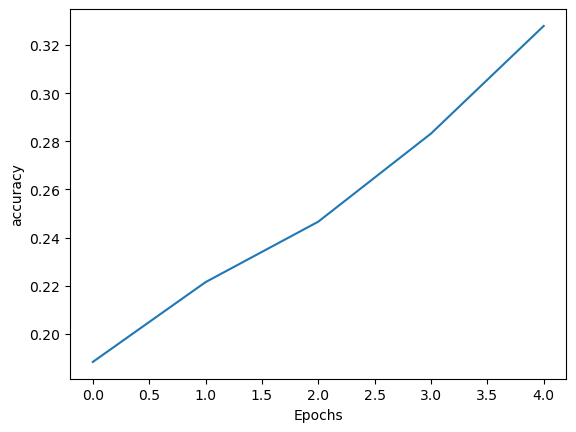

In [86]:
def graph_plot(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
graph_plot(history, 'accuracy')

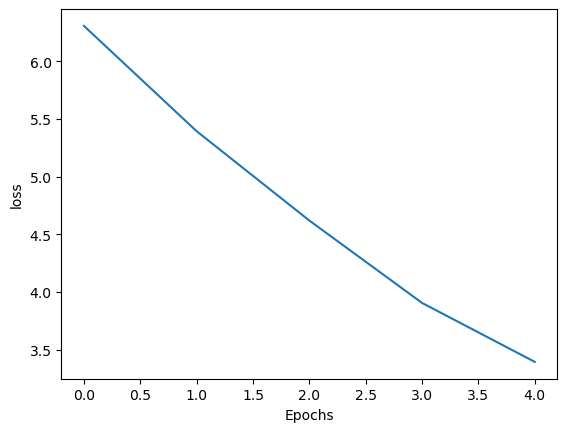

In [87]:
graph_plot(history, 'loss')

### Predicting Next Word


In [108]:
seed_text='implementation of'
next_words= 2

for _ in range(next_words):
    token_list= tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list= pad_sequences([token_list], maxlen= max_seq_len-1, padding= 'pre')
    print(len(token_list))
    predicted= model.predict(token_list, verbose= 0)
    pred_class= np.argmax(predicted)
    print(pred_class)
    output_word= ''
    
    for word, index in tokenizer.word_index.items():
#         print(word)
        if index == pred_class:
            output_word= word
            break
            
    seed_text+= " "+output_word
    
print(seed_text)
        
    

[486, 6]
1
3
[486, 6, 3]
1
1
implementation of the <oov>
